In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# <center>  ETL </br>
#  <center> -- Extraer, Transformar y Cargar --</center>

## 1) Carga de los datos

In [5]:
df_center = pd.read_csv('Call_Center_1999_DataSet.csv', sep=';')
df_center

# - Información de los campos

In [17]:
df_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
 17  startdate    444448 non-null  int64 
dtypes: int64(6), object(12)
memory usage: 61.0+ 

### -- no hay nulos --

# - Cantidad de filas y columnas

In [170]:
df_center.shape

(444448, 18)

In [15]:
df_center

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,1900-01-01 00:00:31,1900-01-01 00:00:36,5,1900-01-01 00:00:36,1900-01-01 00:03:09,153,HANG,1900-01-01 00:00:00,1900-01-01 00:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,1900-01-01 00:34:12,1900-01-01 00:34:23,11,1900-01-01 00:00:00,1900-01-01 00:00:00,0,HANG,1900-01-01 00:00:00,1900-01-01 00:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,1900-01-01 06:55:20,1900-01-01 06:55:26,6,1900-01-01 06:55:26,1900-01-01 06:55:43,17,AGENT,1900-01-01 06:55:43,1900-01-01 06:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,1900-01-01 07:41:16,1900-01-01 07:41:26,10,1900-01-01 00:00:00,1900-01-01 00:00:00,0,AGENT,1900-01-01 07:41:25,1900-01-01 07:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,1900-01-01 08:03:14,1900-01-01 08:03:24,10,1900-01-01 00:00:00,1900-01-01 00:00:00,0,AGENT,1900-01-01 08:03:23,1900-01-01 08:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,17211,0.0,0,IN,1999-12-31,1900-01-01 13:46:51,1900-01-01 13:47:04,13,1900-01-01 00:00:00,1900-01-01 00:00:00,0,AGENT,1900-01-01 13:47:03,1900-01-01 13:56:16,553,Z2ELINOR,334
444444,AA0216,17212,0.0,0,IN,1999-12-31,1900-01-01 13:58:31,1900-01-01 13:58:40,9,1900-01-01 13:58:40,1900-01-01 13:59:49,69,HANG,1900-01-01 00:00:00,1900-01-01 00:00:00,0,NO_SERVER,334
444445,AA0216,17213,0.0,0,IN,1999-12-31,1900-01-01 17:10:51,1900-01-01 17:11:12,21,1900-01-01 00:00:00,1900-01-01 00:00:00,0,HANG,1900-01-01 00:00:00,1900-01-01 00:00:00,0,NO_SERVER,334
444446,AA0216,17214,0.0,0,IN,1999-12-31,1900-01-01 18:30:19,1900-01-01 18:30:54,35,1900-01-01 00:00:00,1900-01-01 00:00:00,0,HANG,1900-01-01 00:00:00,1900-01-01 00:00:00,0,NO_SERVER,334


# 2) Transformación de los tipo de datos

### - Clasificación de los datos según su tipo para su Analisis posterior

In [6]:
date_fomat = '%Y-%m-%d %H:%M:%S'

df_center['vru.line']  =df_center['vru.line'].astype('str')
df_center['call_id']   =df_center['call_id'].astype('str')
df_center['priority']  =df_center['priority'].astype('category')
df_center['type']      =df_center['type'].astype('category')
df_center['date']      =pd.to_datetime(df_center['date'])
df_center['vru_entry'] = pd.to_datetime(df_center['vru_entry'])
df_center['vru_exit']  =pd.to_datetime(df_center['vru_exit'])
df_center['q_start']   =pd.to_datetime(df_center['q_start'])
df_center['q_exit']    =pd.to_datetime(df_center['q_exit'])
df_center['outcome']   =df_center['outcome'].astype('category')
df_center['ser_start'] =pd.to_datetime(df_center['ser_start'])
df_center['ser_exit']  =pd.to_datetime(df_center['ser_exit'])

df_center['server']    =df_center['server'].astype('category')

In [7]:
df_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   vru.line     444448 non-null  object        
 1   call_id      444448 non-null  object        
 2   customer_id  444448 non-null  object        
 3   priority     444448 non-null  category      
 4   type         444448 non-null  category      
 5   date         444448 non-null  datetime64[ns]
 6   vru_entry    444448 non-null  datetime64[ns]
 7   vru_exit     444448 non-null  datetime64[ns]
 8   vru_time     444448 non-null  int64         
 9   q_start      444448 non-null  datetime64[ns]
 10  q_exit       444448 non-null  datetime64[ns]
 11  q_time       444448 non-null  int64         
 12  outcome      444448 non-null  category      
 13  ser_start    444448 non-null  datetime64[ns]
 14  ser_exit     444448 non-null  datetime64[ns]
 15  ser_time     444448 non-null  int6

## - Observación de las variables

In [173]:
df_center.describe(include=['category', 'object'])

,vru.line,call_id,customer_id,priority,type,outcome,server
count,444448,444448,444448.0,444448,444448,444448,444448
unique,30,54471,19048.0,3,8,3,53
top,AA0209,37585,0.0,0,PS,AGENT,NO_SERVER
freq,21423,16,178572.0,235168,302522,353143,96511


In [13]:
df_center.describe()


,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,ser_start,ser_exit,ser_time,startdate
count,444448,444448,444448,444448.000000,444448,444448,444448.000000,444448,444448,444448.000000,444448.000000
mean,1999-07-06 09:55:09.633522944,1900-01-01 14:27:15.241546240,1900-01-01 14:27:25.527627008,10.286081,1900-01-01 08:29:01.435895040,1900-01-01 08:29:48.776293632,59.004304,1900-01-01 11:43:11.602028032,1900-01-01 11:44:47.382784,152.561776,172.333974
min,1999-01-01 00:00:00,1900-01-01 00:00:01,1900-01-01 00:00:08,-362.000000,1900-01-01 00:00:00,1900-01-01 00:00:00,0.000000,1900-01-01 00:00:00,1900-01-01 00:00:00,0.000000,0.000000
25%,1999-04-11 00:00:00,1900-01-01 10:45:42,1900-01-01 10:45:51,6.000000,1900-01-01 00:00:00,1900-01-01 00:00:00,0.000000,1900-01-01 08:37:01,1900-01-01 08:38:59,12.000000,90.000000
50%,1999-07-06 00:00:00,1900-01-01 14:03:55,1900-01-01 14:04:06,8.000000,1900-01-01 10:01:48,1900-01-01 10:03:29,16.000000,1900-01-01 12:23:49,1900-01-01 12:26:31,84.000000,181.000000
75%,1999-10-07 00:00:00,1900-01-01 17:43:51,1900-01-01 17:44:01,10.000000,1900-01-01 14:57:19.249999872,1900-01-01 14:59:05,79.000000,1900-01-01 16:50:35,1900-01-01 16:52:39.249999872,185.000000,273.000000
max,1999-12-31 00:00:00,1900-01-01 23:59:58,1900-01-01 23:59:59,4832.000000,1900-01-01 23:59:59,1900-01-01 23:59:59,28693.000000,1900-01-01 23:59:58,1900-01-01 23:59:59,61437.000000,334.000000
std,NaN,NaN,NaN,34.942136,NaN,NaN,119.470328,NaN,NaN,282.372761,104.559247


In [175]:
print(pd.__version__)

2.1.1


# 3)Creación de id único por llamada

Se observa en describe, que la variable <b>call_id</b>, solo hay 54471 únicos, indicando <b>duplicados</b>. Al ser un ID, debemos crear uno nuevo, único.

In [8]:
df_center['call_id'].nunique()

54471

Se crea a partir de juntar vru_line y call_id

In [10]:
df_center.insert(1, 'ID_call', df_center['vru.line'] + ' ' + df_center['call_id'])

In [18]:
df_center

,vru.line,ID_call,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,AA0101 33116,9664491.0,2,PS,1999-01-01,2023-11-03 00:00:31,2023-11-03 00:00:36,5,2023-11-03 00:00:36,2023-11-03 00:03:09,153,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER,0
1,AA0101,AA0101 33117,0.0,0,PS,1999-01-01,2023-11-03 00:34:12,2023-11-03 00:34:23,11,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER,0
2,AA0101,AA0101 33118,27997683.0,2,PS,1999-01-01,2023-11-03 06:55:20,2023-11-03 06:55:26,6,2023-11-03 06:55:26,2023-11-03 06:55:43,17,AGENT,2023-11-03 06:55:43,2023-11-03 06:56:37,54,MICHAL,0
3,AA0101,AA0101 33119,0.0,0,PS,1999-01-01,2023-11-03 07:41:16,2023-11-03 07:41:26,10,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 07:41:25,2023-11-03 07:44:53,208,BASCH,0
4,AA0101,AA0101 33120,0.0,0,PS,1999-01-01,2023-11-03 08:03:14,2023-11-03 08:03:24,10,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 08:03:23,2023-11-03 08:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,AA0216 17211,0.0,0,IN,1999-12-31,2023-11-03 13:46:51,2023-11-03 13:47:04,13,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 13:47:03,2023-11-03 13:56:16,553,Z2ELINOR,334
444444,AA0216,AA0216 17212,0.0,0,IN,1999-12-31,2023-11-03 13:58:31,2023-11-03 13:58:40,9,2023-11-03 13:58:40,2023-11-03 13:59:49,69,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER,334
444445,AA0216,AA0216 17213,0.0,0,IN,1999-12-31,2023-11-03 17:10:51,2023-11-03 17:11:12,21,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER,334
444446,AA0216,AA0216 17214,0.0,0,IN,1999-12-31,2023-11-03 18:30:19,2023-11-03 18:30:54,35,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER,334


In [17]:
df_center['ID_call'].count()

444448

Eliminación de call_id

In [ ]:
df_center = df_center.drop('call_id', axis=1)

In [19]:
df_center

,vru.line,ID_call,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,AA0101 33116,9664491.0,2,PS,1999-01-01,2023-11-03 00:00:31,2023-11-03 00:00:36,5,2023-11-03 00:00:36,2023-11-03 00:03:09,153,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER,0
1,AA0101,AA0101 33117,0.0,0,PS,1999-01-01,2023-11-03 00:34:12,2023-11-03 00:34:23,11,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER,0
2,AA0101,AA0101 33118,27997683.0,2,PS,1999-01-01,2023-11-03 06:55:20,2023-11-03 06:55:26,6,2023-11-03 06:55:26,2023-11-03 06:55:43,17,AGENT,2023-11-03 06:55:43,2023-11-03 06:56:37,54,MICHAL,0
3,AA0101,AA0101 33119,0.0,0,PS,1999-01-01,2023-11-03 07:41:16,2023-11-03 07:41:26,10,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 07:41:25,2023-11-03 07:44:53,208,BASCH,0
4,AA0101,AA0101 33120,0.0,0,PS,1999-01-01,2023-11-03 08:03:14,2023-11-03 08:03:24,10,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 08:03:23,2023-11-03 08:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,AA0216 17211,0.0,0,IN,1999-12-31,2023-11-03 13:46:51,2023-11-03 13:47:04,13,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 13:47:03,2023-11-03 13:56:16,553,Z2ELINOR,334
444444,AA0216,AA0216 17212,0.0,0,IN,1999-12-31,2023-11-03 13:58:31,2023-11-03 13:58:40,9,2023-11-03 13:58:40,2023-11-03 13:59:49,69,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER,334
444445,AA0216,AA0216 17213,0.0,0,IN,1999-12-31,2023-11-03 17:10:51,2023-11-03 17:11:12,21,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER,334
444446,AA0216,AA0216 17214,0.0,0,IN,1999-12-31,2023-11-03 18:30:19,2023-11-03 18:30:54,35,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER,334


# 4) Eliminación de startdate

Se elimina esta columna porque no se la considera reelevante

In [20]:
df_center = df_center.drop('startdate', axis=1)

In [21]:
df_center

,vru.line,ID_call,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,AA0101 33116,9664491.0,2,PS,1999-01-01,2023-11-03 00:00:31,2023-11-03 00:00:36,5,2023-11-03 00:00:36,2023-11-03 00:03:09,153,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
1,AA0101,AA0101 33117,0.0,0,PS,1999-01-01,2023-11-03 00:34:12,2023-11-03 00:34:23,11,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
2,AA0101,AA0101 33118,27997683.0,2,PS,1999-01-01,2023-11-03 06:55:20,2023-11-03 06:55:26,6,2023-11-03 06:55:26,2023-11-03 06:55:43,17,AGENT,2023-11-03 06:55:43,2023-11-03 06:56:37,54,MICHAL
3,AA0101,AA0101 33119,0.0,0,PS,1999-01-01,2023-11-03 07:41:16,2023-11-03 07:41:26,10,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 07:41:25,2023-11-03 07:44:53,208,BASCH
4,AA0101,AA0101 33120,0.0,0,PS,1999-01-01,2023-11-03 08:03:14,2023-11-03 08:03:24,10,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 08:03:23,2023-11-03 08:05:10,107,MICHAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,AA0216 17211,0.0,0,IN,1999-12-31,2023-11-03 13:46:51,2023-11-03 13:47:04,13,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 13:47:03,2023-11-03 13:56:16,553,Z2ELINOR
444444,AA0216,AA0216 17212,0.0,0,IN,1999-12-31,2023-11-03 13:58:31,2023-11-03 13:58:40,9,2023-11-03 13:58:40,2023-11-03 13:59:49,69,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
444445,AA0216,AA0216 17213,0.0,0,IN,1999-12-31,2023-11-03 17:10:51,2023-11-03 17:11:12,21,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
444446,AA0216,AA0216 17214,0.0,0,IN,1999-12-31,2023-11-03 18:30:19,2023-11-03 18:30:54,35,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER


----------------------------------------
-----------------------------

# <center>EDA </center>
# <center> -*-  Análisis de Datos Exploratorio  -*-</center>

Se comienza el análisis, explorando cada columna (variable)

### - ID_Call (identidficador de llamada, modificado para que sea unico)

____

### - vru.line (donde ingresan las llamadas, canal + línea)

Se calcula la cantidad de llamadas por vru.line

In [22]:
cantidad = df_center['vru.line'].value_counts()
cantidad

vru.line
AA0209    21423
AA0202    21314
AA0206    21087
AA0213    20552
AA0205    20247
AA0203    20056
AA0214    19897
AA0210    19157
AA0204    19011
AA0215    18697
AA0201    17932
AA0103    17627
AA0106    17627
AA0104    17603
AA0109    17580
AA0101    17509
AA0110    17485
AA0105    17452
AA0115    17043
AA0208    13519
AA0207    12665
AA0113    12304
AA0102    11877
AA0216    11852
AA0116     9342
AA0107     3422
AA0111     3381
AA0108     3372
AA0112     2178
AA0114     1237
Name: count, dtype: int64

In [24]:
df_center['vru.line'].nunique() #unicas 30

30

Se grafica las vru_line

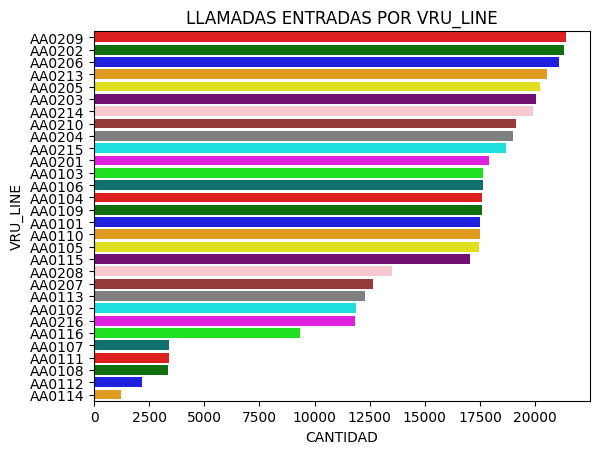

In [27]:
colores_meses = ["red", "green", "blue",  "orange", 'yellow',"purple", "pink", "brown", "gray", "cyan", "magenta", "lime", "teal"]
plt.figure()
sns.barplot(x=cantidad.values, y=cantidad.index, palette=colores_meses)
plt.xlabel('CANTIDAD')
plt.ylabel('VRU_LINE')
plt.title('LLAMADAS ENTRADAS POR VRU_LINE')
plt.show()

VRU AA0209 y AA0202 las que mas llamas atienden

---

### - customer_id (ID_CLIENTE)

In [186]:
df_center['customer_id'].value_counts()

customer_id
0.0           178572
0              55980
58859752.0      1661
58704610.0      1375
7191646.0       1264
               ...  
22862023           1
3100351.0          1
53528683.0         1
15571748.0         1
53525267.0         1
Name: count, Length: 19048, dtype: int64

Se observa cliente 0 y 0.0, llegando a la conclusión que significan el mismo tipo de cliente y se cambia su valor

In [31]:
df_center['customer_id'] = df_center['customer_id'].replace('0', 0.0)

In [32]:
df_center['customer_id'].value_counts()

customer_id
0.0           234552
58859752.0      1661
58704610.0      1375
7191646.0       1264
52867744.0      1207
               ...  
36482305           1
29571775           1
55893531           1
64876170           1
53525267.0         1
Name: count, Length: 19047, dtype: int64

clientes que han llamado alguna vez

In [189]:
df_center['customer_id'].nunique()

19047

In [33]:
value_counts = df_center['customer_id'].value_counts()
porcentaje = (value_counts / len(df_center)) * 100
porcentaje

customer_id
0.0           52.773778
58859752.0     0.373722
58704610.0     0.309373
7191646.0      0.284398
52867744.0     0.271573
                ...    
36482305       0.000225
29571775       0.000225
55893531       0.000225
64876170       0.000225
53525267.0     0.000225
Name: count, Length: 19047, dtype: float64

Los valores de cero identificados, son esperados, porque se informó que corresponden a aquellos que el sistema no pudo identicar. Estos representan cerca del 53% de los registros.

_____________


### - priority (Prioridad en la llamada (0 y 1) ó 2- prioridad especial-)

• 0 y 1 indican clientes no identificados o clientes regulares </br>
• 2 indica clientes de Alta Prioridad.

In [34]:
df_center['priority'].value_counts()

priority
0    235168
2    137453
1     71827
Name: count, dtype: int64

porcentaje q representa

In [39]:
porcentaje1=df_center['priority'].value_counts() / len(df_center) * 100
round(porcentaje1),2

(priority
 0    53.0
 2    31.0
 1    16.0
 Name: count, dtype: float64,
 2)

In [192]:
df_center.groupby('priority')['q_time_real'].agg(['mean'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3192\3312224915.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_center.groupby('priority')['q_time_real'].agg(['mean'])


KeyError: 'Column not found: q_time_real'

Conclusion: del total de llamadas:
- 2 = 31% son de alta prioridad
- 0 y 1 = 69% comunes

____________

### -  type (tipo de servicio) :Hay 6 tipos diferentes de servicio:</br>
• PS - Actividad Regular</br>
• PE - Actividad Regular en inglés</br>
• IN - Actividad / Consulta por internet</br>
• NE - Actividad por Acciones (stock exchange)</br>
• NW - Cliente potencial (prospecto) solicitando información</br>
• TT – clientes que dejan un mensaje pidiendo al banco que le devuelvan su llamado

In [40]:
df_center['type'].value_counts()

type
PS     302522
NW      67728
NE      39342
IN      20732
TT      12289
PE       1824
 TT         6
AA          5
Name: count, dtype: int64

Se observa que 'TT' tiene espacios extras, por lo que se limpia esa columna.

In [41]:
df_center['type'] = df_center['type'].str.strip()
df_center['type'].value_counts()

type
PS    302522
NW     67728
NE     39342
IN     20732
TT     12295
PE      1824
AA         5
Name: count, dtype: int64

Se observa AA y no es un valor definido asiq se borran los registros y porque tiene prioridad 0

In [42]:
df_center.drop(df_center[df_center['type'] == 'AA'].index, inplace=True)

In [43]:
round(((df_center['type'].value_counts() / len(df_center)) * 100),2)

type
PS    68.07
NW    15.24
NE     8.85
IN     4.66
TT     2.77
PE     0.41
Name: count, dtype: float64

PS que significa Actividad regular, fue el servicio que se prestó en el 68% de los llamados.

---

### - DATE (Fecha - v. cuantitativa )

Se separa el mes en una columna, para ver su comportamiento por mes, y se hace una columna de año para conservarlo, aunque sabemos que solo hay 1999

In [44]:
# Se agrega una nueva columna para el mes
df_center.insert(5, 'Month', df_center['date'].dt.month)

In [45]:
#insertamos columna con Año
df_center.insert(6, 'Year', df_center['date'].dt.year)

In [46]:
# eliminamos columna Date
df_center = df_center.drop('date', axis=1)

### Se grafica el volumen de llamadas por mes

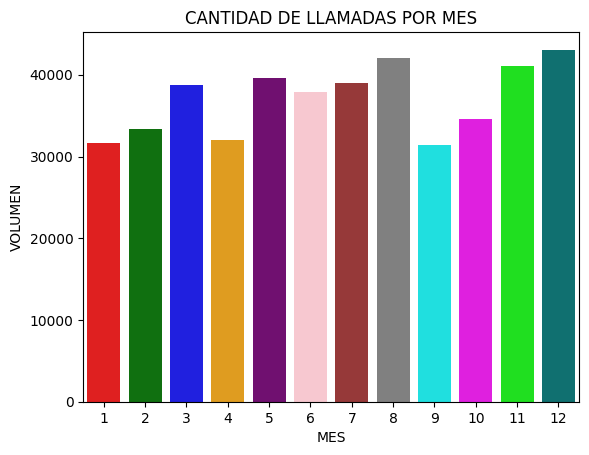

In [47]:
colores_meses = ["red", "green", "blue", "orange", "purple", "pink", "brown", "gray", "cyan", "magenta", "lime", "teal"]
plt.figure()
sns.countplot(data=df_center, x='Month', palette=colores_meses)
plt.xlabel('MES')
plt.ylabel('VOLUMEN')
plt.title('CANTIDAD DE LLAMADAS POR MES')
plt.show()

### Conclusión: 
- Diciembre y Agosto: mayor
- Enero, Abril, Septiembre, menos llamadas

_____

### - Vru_entry - Vru_exit - Vru_time (tiempos referidos a la LLAMADA)

 Se observan la frecuencia de llamadas por horas


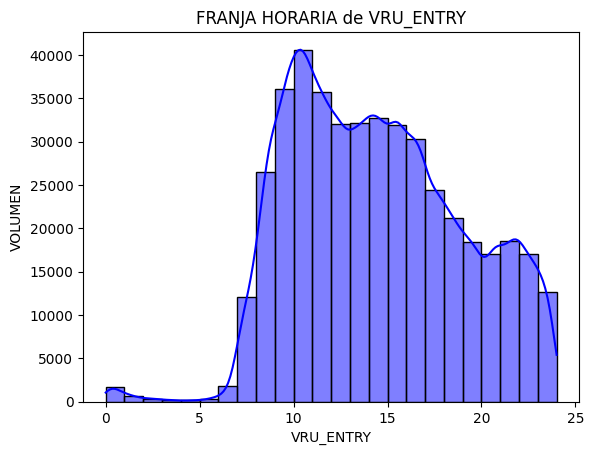

In [51]:
plt.figure()
sns.histplot(data=df_center, x=(df_center['vru_entry'] - df_center['vru_entry'].dt.normalize()) / pd.Timedelta(hours=1),bins=24, kde=True, color= 'blue')
plt.xlabel('VRU_ENTRY')
plt.ylabel('VOLUMEN')
plt.title('FRANJA HORARIA de VRU_ENTRY')
plt.show()


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


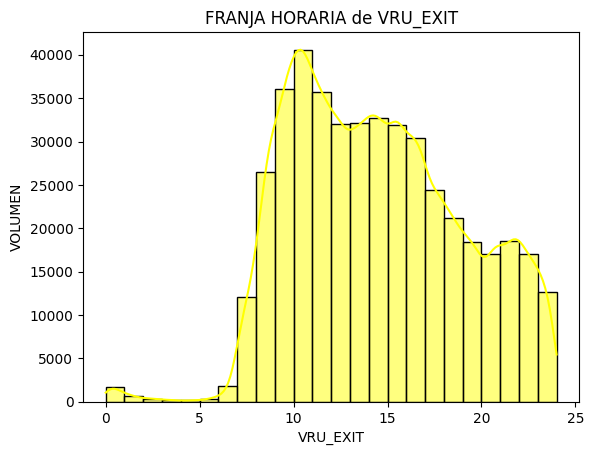

In [202]:
plt.figure()
sns.histplot(data=df_center, x=(df_center['vru_exit'] - df_center['vru_exit'].dt.normalize()) / pd.Timedelta(hours=1),bins=24, kde=True, color= 'yellow')
plt.xlabel('VRU_EXIT')
plt.ylabel('VOLUMEN')
plt.title('FRANJA HORARIA de VRU_EXIT')
plt.show()

Conclusión:
- 10-11hs: mayor cantidad de llamadas
- 14-15hs: un nuevo pico de llamadas 
- 0-6hs: servicio automatico- baja considerable

VRU_TIME: tiene tiempos negativos, por lo que se observa 

In [203]:
df_center['vru_time'].describe()

count    444448.000000
mean         10.286081
std          34.942136
min        -362.000000
25%           6.000000
50%           8.000000
75%          10.000000
max        4832.000000
Name: vru_time, dtype: float64

Se cuentan los valores negativos

In [52]:
cant_neg = (df_center['vru_time'] < 0).sum()
cant_neg

350

In [53]:
porc_neg = round(cant_neg/df_center['vru_time'].count()*100, 2)
porc_neg

0.08

Si bien es un porcentaje pequeño, se  interpreta que se han cambiado de columna, por lo que se colocan de forma correcta

In [ ]:
#df_center = df_center.drop('VRU_entry_N', axis=1)
#df_center = df_center.drop('VRU_exit_N', axis=1)

In [54]:
df_center['VRU_entry_N'] = np.where(df_center['vru_entry'] > df_center['vru_exit'], df_center['vru_exit'], df_center['vru_entry'])
columna_temporal = df_center.pop('VRU_entry_N')
df_center.insert(8, 'VRU_entry_N', columna_temporal)
df_center['VRU_exit_N'] = np.where(df_center['vru_entry'] > df_center['vru_exit'], df_center['vru_entry'], df_center['vru_exit'])
columna_temporal = df_center.pop('VRU_exit_N')
df_center.insert(9, 'VRU_exit_N', columna_temporal)


In [55]:
df_center['VRU_time_N'] = (df_center['VRU_exit_N'] - df_center['VRU_entry_N']).dt.total_seconds()
df_center['VRU_time_N'] = df_center['VRU_time_N'].astype('int64')
columna_temporal = df_center.pop('VRU_time_N')
df_center.insert(10, 'VRU_time_N', columna_temporal)

Se eliminan las columnas erroneas

In [56]:
df_center = df_center.drop('vru_entry', axis=1)
df_center = df_center.drop('vru_exit', axis=1)
df_center = df_center.drop('vru_time', axis=1)

In [57]:
df_center['VRU_time_N'].describe()

count    444443.000000
mean         10.396195
std          34.909622
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max        4832.000000
Name: VRU_time_N, dtype: float64

Se grafica la dispersion de las llamadas

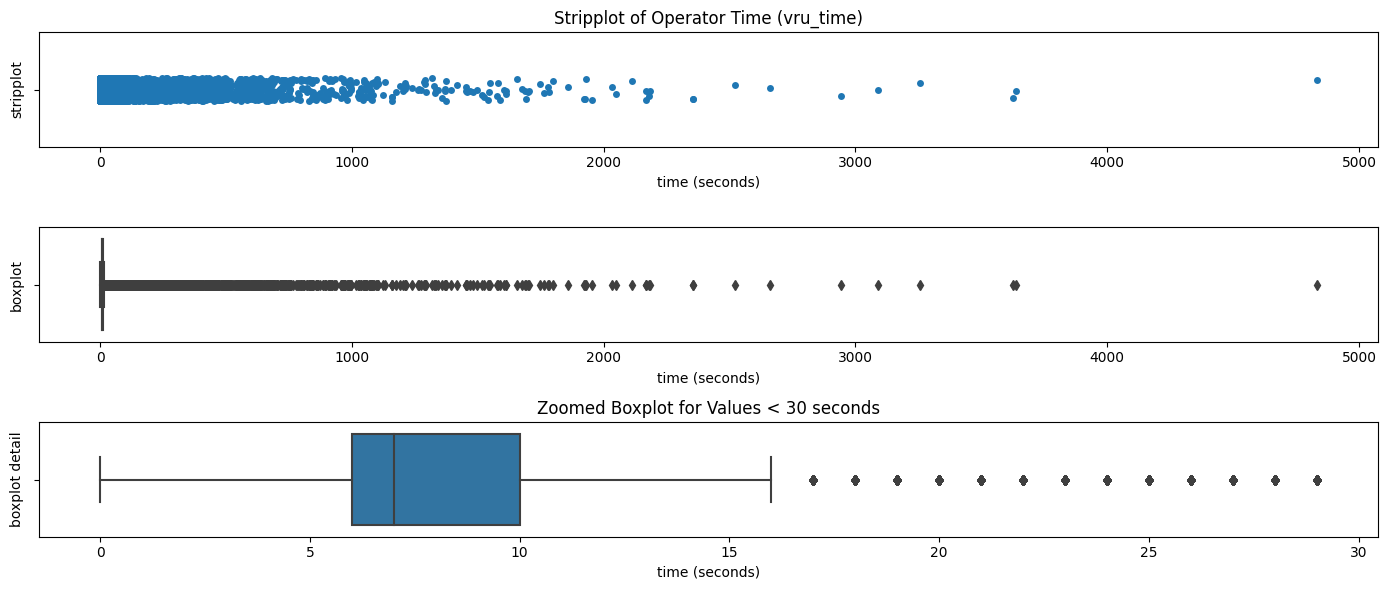

In [58]:

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df_center, x='VRU_time_N', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of Operator Time (vru_time)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df_center, x='VRU_time_N', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df_center[df_center['VRU_time_N'] < 30], x='VRU_time_N', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

Se calculan los outliers vistos graficamente

In [59]:
outlier_count = (df_center['VRU_time_N'] > 16).sum()
perc_outlier = round(outlier_count/df_center['VRU_time_N'].count()*100,2)
print('Cantidad de valores outlier sobre 16 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 16 segundos:  26651
Porcentaje sobre el total: 6.0 %


In [69]:
outlier_count = (df_center['VRU_time_N'] > 1100).sum()
perc_outlier = round(outlier_count/df_center['VRU_time_N'].count()*100,2)
print('Cantidad de valores outlier sobre 1100 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 1100 segundos:  83
Porcentaje sobre el total: 0.02 %


In [71]:
df_center['VRU_time_N'].describe()

count    444443.000000
mean         10.396195
std          34.909622
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max        4832.000000
Name: VRU_time_N, dtype: float64

Conclusión: 
- vru_time (corregida): el 75% de las llamadas = duración de 10s </br>
                        MAX = 4832s</br>
                        
El detalle del boxplot muestra que por arriba de los 16 segundos aproximadamente, hay 26651 llamados, que representan cerca del 6% de todos los registros, que podrían ser considerados como atípicos. No obstantes, tiempos de espera hasta 18 minutos (1100 segundos aproximadamente), podrían asumirse como aceptables. En tal caso, quedarían solo 83 llamadas como outliers representando el 0.02% de los llamados. Se decide eliminar estos registros.

In [73]:
df_center.drop(df_center[df_center['VRU_time_N'] > 1100].index, inplace=True)

In [75]:
df_center.count()

vru.line       444360
ID_call        444360
customer_id    444360
priority       444360
type           444360
Month          444360
Year           444360
VRU_entry_N    444360
VRU_exit_N     444360
VRU_time_N     444360
q_start        444360
q_exit         444360
q_time         444360
outcome        444360
ser_start      444360
ser_exit       444360
ser_time       444360
server         444360
dtype: int64

____

### - q_start y q_exit (tiempo en COLA)

Se observan la frecuencia de llamadas por horas

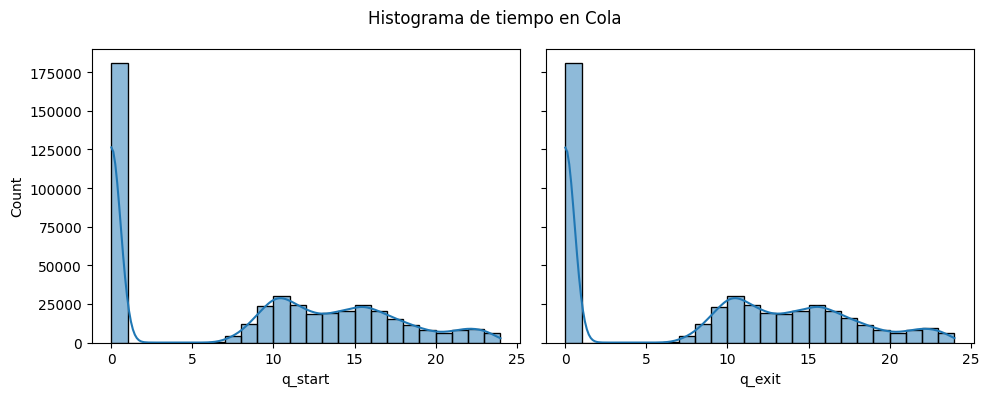

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.histplot(data=df_center, x=(df_center['q_start'] - df_center['q_start'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax1)
sns.histplot(data=df_center, x=(df_center['q_exit'] - df_center['q_exit'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax2)

ax1.set_xlabel('q_start') ; ax1.set_ylabel('Count')
ax2.set_xlabel('q_exit')
plt.suptitle('Histograma de tiempo en Cola')
plt.tight_layout()
plt.show()

Se contabiliza la cantidad en 0

In [77]:
count_0 = (df_center['q_start'].dt.time == pd.to_datetime('00:00:00').time()).sum()
count_0


180761

In [78]:
porcentaje_0 = round(count_0/df_center['q_start'].count()*100, 2)
porcentaje_0

40.68

Conclusión:
- 180761 clientes abadonan la llamada estando en el VRU (son registrados en 00:00:00). Esto representa el 41% de las llamadas que ingresan aproximadamente.

### - q_time

In [ ]:
#df_center = df_center.drop('q_time_REAL', axis=1)

Se agrega una columna con los tiempos reales de espera segun la prioridad 2

In [79]:

def modify_q_time(row):
    if row['priority'] == 2:
        modified_value = row['q_time'] - 90
        return max(modified_value, 0)
    else:
        return row['q_time']

df_center['q_time_REAL'] = df_center.apply(modify_q_time, axis=1)
columna_temporal = df_center.pop('q_time_REAL')
df_center.insert(13, 'q_time_REAL', columna_temporal)

In [80]:
df_center = df_center.drop('q_time', axis=1)

In [81]:
df_center

,vru.line,ID_call,customer_id,priority,type,Month,Year,VRU_entry_N,VRU_exit_N,VRU_time_N,q_start,q_exit,q_time_REAL,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,AA0101 33116,9664491.0,2,PS,1,1999,2023-11-03 00:00:31,2023-11-03 00:00:36,5,2023-11-03 00:00:36,2023-11-03 00:03:09,63,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
1,AA0101,AA0101 33117,0.0,0,PS,1,1999,2023-11-03 00:34:12,2023-11-03 00:34:23,11,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
2,AA0101,AA0101 33118,27997683.0,2,PS,1,1999,2023-11-03 06:55:20,2023-11-03 06:55:26,6,2023-11-03 06:55:26,2023-11-03 06:55:43,0,AGENT,2023-11-03 06:55:43,2023-11-03 06:56:37,54,MICHAL
3,AA0101,AA0101 33119,0.0,0,PS,1,1999,2023-11-03 07:41:16,2023-11-03 07:41:26,10,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 07:41:25,2023-11-03 07:44:53,208,BASCH
4,AA0101,AA0101 33120,0.0,0,PS,1,1999,2023-11-03 08:03:14,2023-11-03 08:03:24,10,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 08:03:23,2023-11-03 08:05:10,107,MICHAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,AA0216 17211,0.0,0,IN,12,1999,2023-11-03 13:46:51,2023-11-03 13:47:04,13,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 13:47:03,2023-11-03 13:56:16,553,Z2ELINOR
444444,AA0216,AA0216 17212,0.0,0,IN,12,1999,2023-11-03 13:58:31,2023-11-03 13:58:40,9,2023-11-03 13:58:40,2023-11-03 13:59:49,69,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
444445,AA0216,AA0216 17213,0.0,0,IN,12,1999,2023-11-03 17:10:51,2023-11-03 17:11:12,21,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
444446,AA0216,AA0216 17214,0.0,0,IN,12,1999,2023-11-03 18:30:19,2023-11-03 18:30:54,35,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER


In [82]:
df_center['q_time_REAL'].describe()

count    444360.000000
mean         42.297563
std         113.654151
min           0.000000
25%           0.000000
50%           0.000000
75%          44.000000
max       28693.000000
Name: q_time_REAL, dtype: float64

Se grafican la dispersion de las llamadas

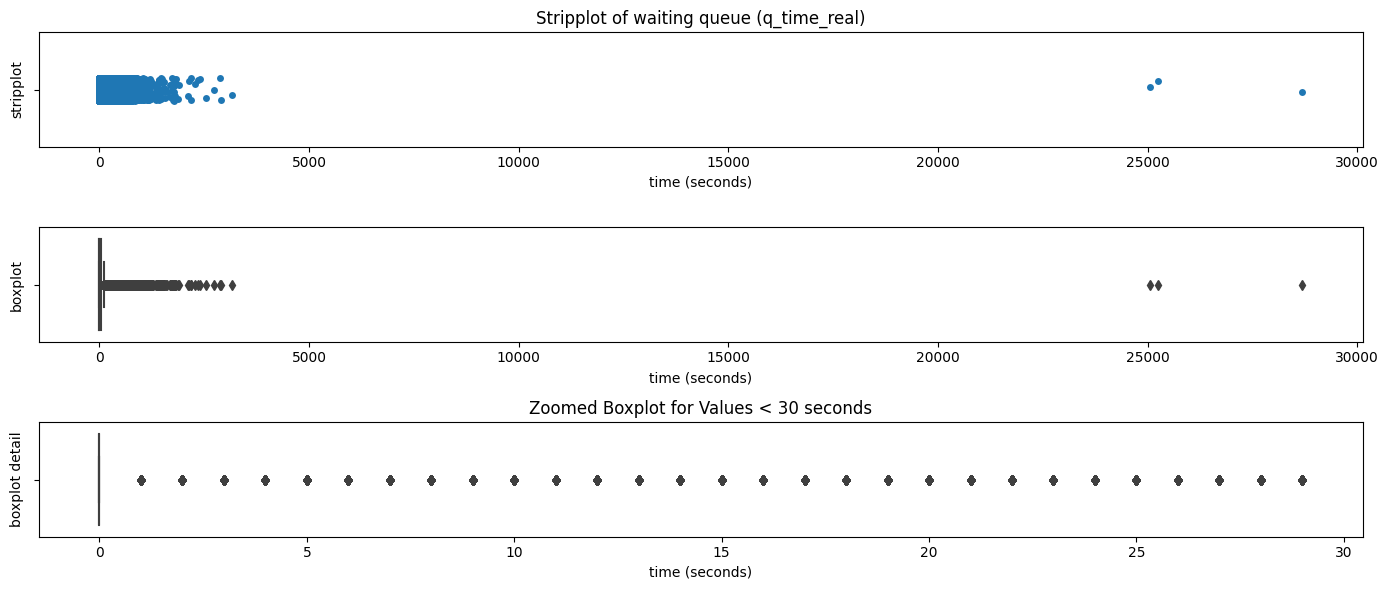

In [83]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df_center, x='q_time_REAL', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of waiting queue (q_time_real)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df_center, x='q_time_REAL', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df_center[df_center['q_time_REAL'] < 30], x='q_time_REAL', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

Se observan 3 valores atípicos mayores a los 3000 segundos, se los considera outliers, se eliminan

In [89]:
df_center.drop(df_center[df_center['q_time_REAL'] > 3000].index, inplace=True)

In [90]:
df_center['q_time_REAL'] .count()

444345

In [91]:
(df_center['q_time_REAL'] > 20000).sum()

0

Se repite la grafica

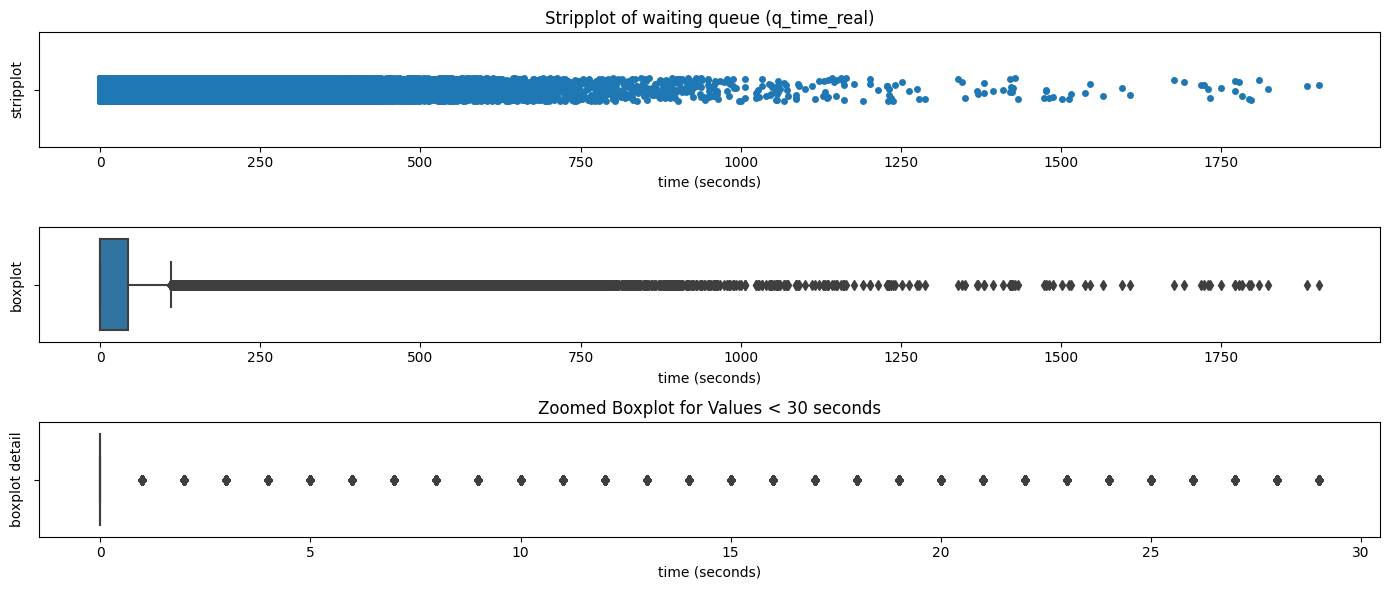

In [92]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df_center, x='q_time_REAL', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of waiting queue (q_time_real)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df_center, x='q_time_REAL', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df_center[df_center['q_time_REAL'] < 30], x='q_time_REAL', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

In [95]:
outlier_count = (df_center['q_time_REAL'] > 3000).sum()
perc_outlier = round(outlier_count/df_center['q_time_REAL'].count()*100,2)
print('Cantidad de valores outlier sobre 3000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 3000 segundos:  0
Porcentaje sobre el total: 0.0 %


In [96]:
outlier_count = (df_center['q_time_REAL'] > 1000).sum()
perc_outlier = round(outlier_count/df_center['q_time_REAL'].count()*100,2)
print('Cantidad de valores outlier sobre 1000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 1000 segundos:  119
Porcentaje sobre el total: 0.03 %


En el mismo sentido, y siguiendo con la lógica planteada en vru_time, se asume que una espera de mas de 1000 segundos no es viable. Las llamadas mayores a 1000 segundos son 119 y representan el 0.03%, por lo que se decide borrar.

In [228]:
df_center = df_center[df_center['q_time_REAL'] <= 1000]
(df_center['q_time_REAL'] > 1000).sum()

0

In [97]:
df_center.drop(df_center[df_center['q_time_REAL'] > 1000].index, inplace=True)

Se grafican nuevamente

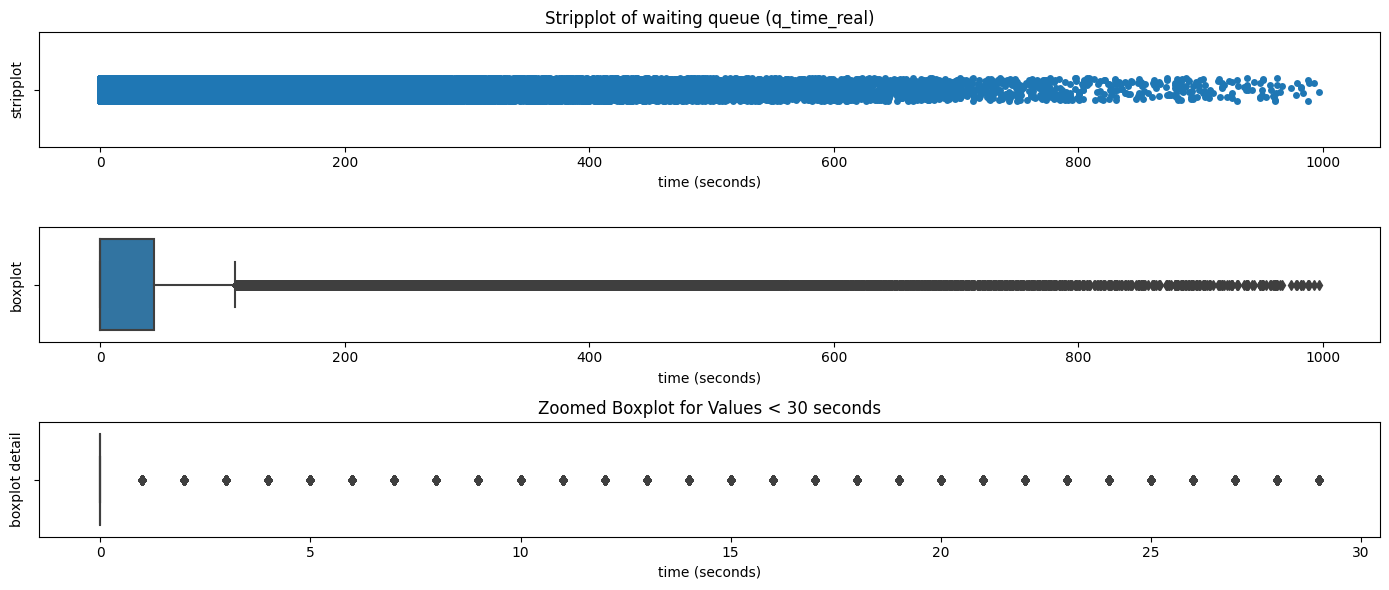

In [98]:

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df_center, x='q_time_REAL', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of waiting queue (q_time_real)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df_center, x='q_time_REAL', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df_center[df_center['q_time_REAL'] < 30], x='q_time_REAL', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()


In [99]:
df_center['q_time_REAL'].describe()

count    444226.000000
mean         41.718821
std          87.372302
min           0.000000
25%           0.000000
50%           0.000000
75%          44.000000
max         997.000000
Name: q_time_REAL, dtype: float64

Considerando a los clientes prioritarios con el tiempo real de espera, se oberva que el 50% de las llamadas son atendidas inmediatamente y que el 75% de las llamadas esperan en la cola menos de 44 segundos.

In [100]:
df_center


,vru.line,ID_call,customer_id,priority,type,Month,Year,VRU_entry_N,VRU_exit_N,VRU_time_N,q_start,q_exit,q_time_REAL,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,AA0101 33116,9664491.0,2,PS,1,1999,2023-11-03 00:00:31,2023-11-03 00:00:36,5,2023-11-03 00:00:36,2023-11-03 00:03:09,63,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
1,AA0101,AA0101 33117,0.0,0,PS,1,1999,2023-11-03 00:34:12,2023-11-03 00:34:23,11,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
2,AA0101,AA0101 33118,27997683.0,2,PS,1,1999,2023-11-03 06:55:20,2023-11-03 06:55:26,6,2023-11-03 06:55:26,2023-11-03 06:55:43,0,AGENT,2023-11-03 06:55:43,2023-11-03 06:56:37,54,MICHAL
3,AA0101,AA0101 33119,0.0,0,PS,1,1999,2023-11-03 07:41:16,2023-11-03 07:41:26,10,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 07:41:25,2023-11-03 07:44:53,208,BASCH
4,AA0101,AA0101 33120,0.0,0,PS,1,1999,2023-11-03 08:03:14,2023-11-03 08:03:24,10,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 08:03:23,2023-11-03 08:05:10,107,MICHAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,AA0216 17211,0.0,0,IN,12,1999,2023-11-03 13:46:51,2023-11-03 13:47:04,13,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 13:47:03,2023-11-03 13:56:16,553,Z2ELINOR
444444,AA0216,AA0216 17212,0.0,0,IN,12,1999,2023-11-03 13:58:31,2023-11-03 13:58:40,9,2023-11-03 13:58:40,2023-11-03 13:59:49,69,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
444445,AA0216,AA0216 17213,0.0,0,IN,12,1999,2023-11-03 17:10:51,2023-11-03 17:11:12,21,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
444446,AA0216,AA0216 17214,0.0,0,IN,12,1999,2023-11-03 18:30:19,2023-11-03 18:30:54,35,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER


_________________

### - ser_start y ser_exit (Tiempo de Servicio)

Se observan la frecuencia de llamadas por horas

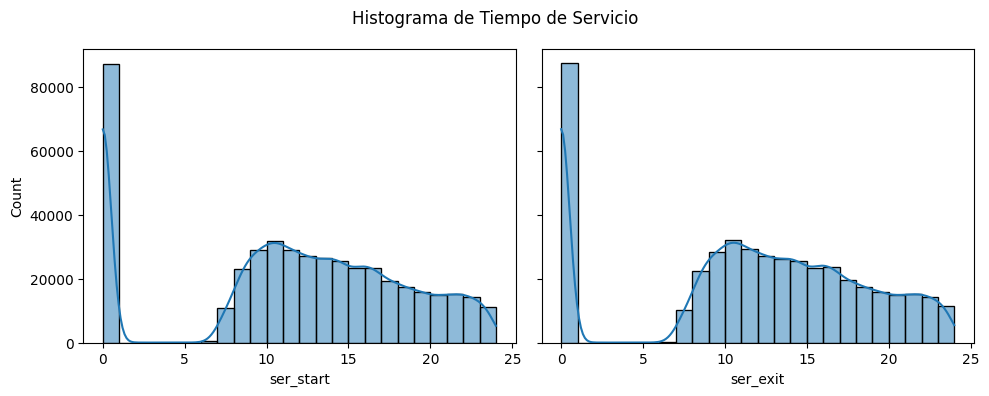

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.histplot(data=df_center, x=(df_center['ser_start'] - df_center['ser_start'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax1)
sns.histplot(data=df_center, x=(df_center['ser_exit'] - df_center['ser_exit'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax2)

ax1.set_xlabel('ser_start') ; ax1.set_ylabel('Count')
ax2.set_xlabel('ser_exit')
plt.suptitle('Histograma de Tiempo de Servicio')
plt.tight_layout()
plt.show()

In [102]:
count_midnight = (df_center['ser_start'].dt.time == pd.to_datetime('00:00:00').time()).sum()
perc_midnight = round(count_midnight/df_center['ser_start'].count()*100, 2)
print('Cantidad de valores 00:00:00: ', count_midnight)
print('Porcentaje sobre el total:', perc_midnight)

Cantidad de valores 00:00:00:  86999
Porcentaje sobre el total: 19.58


Se observa que en el caso de clientes que abandonan la llamada es mucho menos cuando ya los atienden que cuando están en la cola de espera, estos son 86999 clientes que representan cerca del 20% de las llamadas.

### - ser_time

Se grafica la dispersion de las llamadas

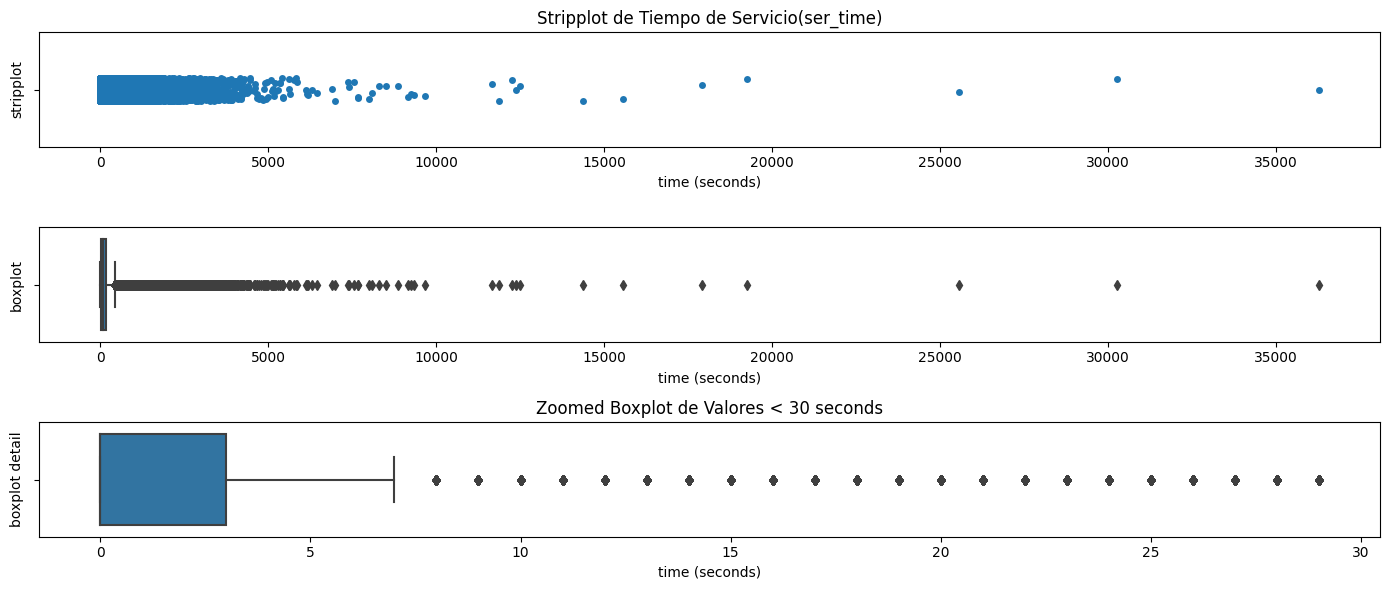

In [104]:

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df_center, x='ser_time', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot de Tiempo de Servicio(ser_time)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df_center, x='ser_time', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df_center[df_center['ser_time'] < 30], x='ser_time', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot de Valores < 30 seconds')

plt.tight_layout()

In [105]:
zero_count = (df_center['ser_time'] == 0).sum()
perc_zero = round(zero_count/df_center['ser_time'].count()*100,2)
print('Cantidad de valores de 0 segundos: ', zero_count)
print('Porcentaje sobre el total:', perc_zero, '%')

Cantidad de valores de 0 segundos:  87709
Porcentaje sobre el total: 19.74 %


In [108]:
outlier_count = (df_center['ser_time'] > 20000).sum()
perc_outlier = round(outlier_count/df_center['ser_time'].count()*100,2)
print('Cantidad de valores outlier sobre 25000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 25000 segundos:  3
Porcentaje sobre el total: 0.0 %


In [107]:
outlier_count = (df_center['ser_time'] > 1000).sum()
perc_outlier = round(outlier_count/df_center['ser_time'].count()*100,2)
print('Cantidad de valores outlier sobre 1000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 1000 segundos:  5790
Porcentaje sobre el total: 1.3 %


al lo visto en ser_start y ser_exit, hay valores de duración 0 que representan cerca del 20% de las llamadas. Por otra parte, tal lo observado anteriormente, se observan 3 valores claramente atípicos, con duración de mas de 25000 segundos. Y siguiendo con el razonamiento anteriormente planteado, se observa que las llamadas de mas de 1000 segundos son poco viables y representan el 1.3% de los datos. Por lo tanto, se decide borrar estos valores.

In [109]:
df_center.drop(df_center[df_center['ser_time'] > 1000].index, inplace=True)

In [237]:
df_center = df_center[df_center['ser_time'] <= 1000]
(df_center['ser_time'] > 1000).sum()

0

In [110]:
df_center['ser_time'].describe()

count    438436.000000
mean        133.679093
std         165.009067
min           0.000000
25%          10.000000
50%          82.000000
75%         178.000000
max        1000.000000
Name: ser_time, dtype: float64

El 75% de los llamados tienen tiempos de servicio menores a 178 segundos con una media de 133 segundos.

_____


### - outcome

Hay tres posibles salidas por cada llamada:</br>
1. AGENT: se dio servicio</br>
2. HANG: se cortó la llamada y no se dió servicio</br>
3. PHANTOM: una llamada en la que virtualmente se ignora lo que sucedió

In [111]:
round(((df_center['outcome'].value_counts() / len(df_center)) * 100),2)

outcome
AGENT      79.22
HANG       19.96
PHANTOM     0.82
Name: count, dtype: float64

Conclusion: 3 categorías AGENT: se dio servicio. 79% de las llamadas.
 Alrededor del 20% son llamados donde el cliente cortó o no se dio el servicio.

### - Server

In [117]:
df_center['server'].value_counts()

server
NO_SERVER       96301
SHARON          27350
STEREN          20338
AVNI            19787
MORIAH          19422
AVI             19366
KAZAV           18527
YITZ            16962
TOVA            16957
BASCH           15456
ROTH            14985
ZOHARI          14965
BENSION         13660
VICKY           12990
DORIT           12729
YIFAT           11962
ANAT             8625
GILI             7226
MIKI             6742
IDIT             6672
ZIPI             6212
AVIDAN           5168
ELI              5054
NAAMA            4602
DARMON           4554
GOLDIE           4021
GELBER           3924
SHLOMO           3208
MICHAL           2813
PINHAS           1916
MEIR             1901
Z2EYAL           1869
Z2NIRIT          1680
Z2ARIE           1360
BRUHI            1150
Z2ELINOR         1068
MOTI             1038
Z2OFERZ           981
NO_SERVERAMA      881
Z2IFAT            791
TALI              758
Z2LIOR            601
Z2SPIEGEL         421
MOSHE             368
ANO_SERVERT       332
Z2O

In [119]:
df_no_server = df_center[df_center['server'] == 'NO_SERVER']
df_no_server

,vru.line,ID_call,customer_id,priority,type,Month,Year,VRU_entry_N,VRU_exit_N,VRU_time_N,q_start,q_exit,q_time_REAL,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,AA0101 33116,9664491.0,2,PS,1,1999,2023-11-03 00:00:31,2023-11-03 00:00:36,5,2023-11-03 00:00:36,2023-11-03 00:03:09,63,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
1,AA0101,AA0101 33117,0.0,0,PS,1,1999,2023-11-03 00:34:12,2023-11-03 00:34:23,11,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
18,AA0101,AA0101 33134,0.0,0,PS,1,1999,2023-11-03 11:07:30,2023-11-03 11:07:38,8,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 11:07:43,2023-11-03 11:07:46,3,NO_SERVER
25,AA0101,AA0101 33141,27347905.0,1,PS,1,1999,2023-11-03 13:12:08,2023-11-03 13:12:13,5,2023-11-03 13:12:13,2023-11-03 13:14:05,112,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
28,AA0101,AA0101 33144,0.0,0,PS,1,1999,2023-11-03 14:07:17,2023-11-03 14:07:34,17,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444442,AA0216,AA0216 17210,0.0,0,IN,12,1999,2023-11-03 13:26:23,2023-11-03 13:26:33,10,2023-11-03 13:26:33,2023-11-03 13:27:26,53,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
444444,AA0216,AA0216 17212,0.0,0,IN,12,1999,2023-11-03 13:58:31,2023-11-03 13:58:40,9,2023-11-03 13:58:40,2023-11-03 13:59:49,69,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
444445,AA0216,AA0216 17213,0.0,0,IN,12,1999,2023-11-03 17:10:51,2023-11-03 17:11:12,21,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
444446,AA0216,AA0216 17214,0.0,0,IN,12,1999,2023-11-03 18:30:19,2023-11-03 18:30:54,35,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER


Se observan 96301 registros NO_SERVER. Por lo que se considera una columna dudosa, se la deberia eliminar, pero al observar que hay con prioridad =2 se la dejará para no interferir en otros analisis, y porque no hay nulos.

In [240]:

#df_center = df_center.drop('server', axis=1)

## Guardamos en un CSV

In [120]:
df_center.to_csv('Center_limpio_eda.csv', index=False)
print("guardado Center_limpio_eda.csv'")

guardado Center_limpio_eda.csv'


In [121]:
df_center

,vru.line,ID_call,customer_id,priority,type,Month,Year,VRU_entry_N,VRU_exit_N,VRU_time_N,q_start,q_exit,q_time_REAL,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,AA0101 33116,9664491.0,2,PS,1,1999,2023-11-03 00:00:31,2023-11-03 00:00:36,5,2023-11-03 00:00:36,2023-11-03 00:03:09,63,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
1,AA0101,AA0101 33117,0.0,0,PS,1,1999,2023-11-03 00:34:12,2023-11-03 00:34:23,11,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
2,AA0101,AA0101 33118,27997683.0,2,PS,1,1999,2023-11-03 06:55:20,2023-11-03 06:55:26,6,2023-11-03 06:55:26,2023-11-03 06:55:43,0,AGENT,2023-11-03 06:55:43,2023-11-03 06:56:37,54,MICHAL
3,AA0101,AA0101 33119,0.0,0,PS,1,1999,2023-11-03 07:41:16,2023-11-03 07:41:26,10,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 07:41:25,2023-11-03 07:44:53,208,BASCH
4,AA0101,AA0101 33120,0.0,0,PS,1,1999,2023-11-03 08:03:14,2023-11-03 08:03:24,10,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 08:03:23,2023-11-03 08:05:10,107,MICHAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,AA0216 17211,0.0,0,IN,12,1999,2023-11-03 13:46:51,2023-11-03 13:47:04,13,2023-11-03 00:00:00,2023-11-03 00:00:00,0,AGENT,2023-11-03 13:47:03,2023-11-03 13:56:16,553,Z2ELINOR
444444,AA0216,AA0216 17212,0.0,0,IN,12,1999,2023-11-03 13:58:31,2023-11-03 13:58:40,9,2023-11-03 13:58:40,2023-11-03 13:59:49,69,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
444445,AA0216,AA0216 17213,0.0,0,IN,12,1999,2023-11-03 17:10:51,2023-11-03 17:11:12,21,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER
444446,AA0216,AA0216 17214,0.0,0,IN,12,1999,2023-11-03 18:30:19,2023-11-03 18:30:54,35,2023-11-03 00:00:00,2023-11-03 00:00:00,0,HANG,2023-11-03 00:00:00,2023-11-03 00:00:00,0,NO_SERVER


In [122]:
df_center['ID_call'].count()

438436

In [123]:
df_center.shape

(438436, 18)